In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
BASE_PATH = Path('../')
DATA_PATH = BASE_PATH / 'data'
TRAIN_DIR = DATA_PATH / 'train'
TEST_DIR = DATA_PATH / 'test'
TRAIN_CSV = DATA_PATH / 'train.csv'

# Load train data
print("Loading training data...")
train_df = pd.read_csv(TRAIN_CSV)

def get_text(file_path):
    """Reads text from a file"""
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return f.read()
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""

# Load text content into df
tqdm.pandas(desc="Loading Text 1")
train_df['text_1'] = train_df['id'].progress_apply(lambda x: get_text(TRAIN_DIR / f'article_{x:04d}' / 'file_1.txt'))

tqdm.pandas(desc="Loading Text 2")
train_df['text_2'] = train_df['id'].progress_apply(lambda x: get_text(TRAIN_DIR / f'article_{x:04d}' / 'file_2.txt'))

# Create cols for real and fake text
train_df['real_text'] = np.where(train_df['real_text_id'] == 1, train_df['text_1'], train_df['text_2'])
train_df['fake_text'] = np.where(train_df['real_text_id'] == 1, train_df['text_2'], train_df['text_1'])

print("Data Loading complete")
print(f"Train DataFrame shape: {train_df.shape}")
display(train_df.head())

Loading training data...


Loading Text 1:   0%|          | 0/95 [00:00<?, ?it/s]

Loading Text 2:   0%|          | 0/95 [00:00<?, ?it/s]

Data Loading complete
Train DataFrame shape: (95, 6)


,id,real_text_id,text_1,text_2,real_text,fake_text
0,0,1,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...
1,1,2,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...,The project aims to achieve an accuracy level ...,China\nThe goal of this project involves achie...
2,2,1,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...
3,3,2,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...,The importance for understanding how stars evo...,China\nThe study suggests that multiple star s...
4,4,2,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...,Analyzing how fast stars rotate within a galax...,Dinosaur Rex was excited about his new toy set...


# EDA

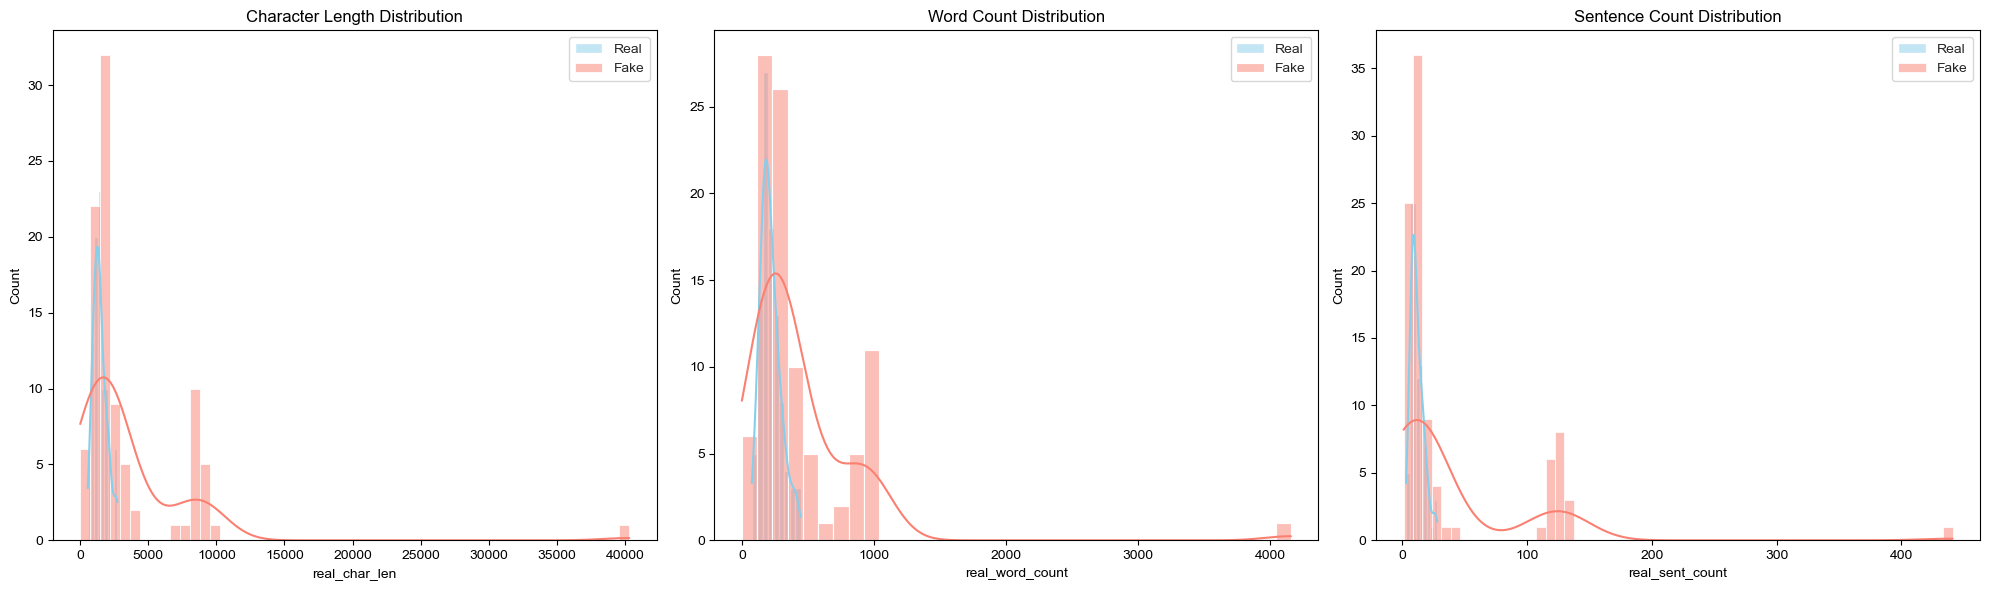

--- Example Pair (ID: 0) ---

[REAL TEXT]
The VIRSA (Visible Infrared Survey Telescope Array) project produces vast amounts of high quality astronomical datasets used extensively across various fields within astronomy due to its rigorous quality control procedures involving continuous monitoring system stability checks alongside observations done with standard stars combined with extensive processing at dedicated centers . Data is publicly accessible through a specific website managed under Phase III releases where it is searchable via ...

[FAKE TEXT]
The China relay network has released a significant amount (over four petabytes) worth off information related to its ongoing research projects since its launch last year . This includes a wide range of datasets covering a vast area (around one million square degrees) collected using various telescopes such as those involved with both ground observation instruments like those at Mauna Kea observatories as well as some space exploration pr

In [3]:
# Char len
train_df['real_char_len'] = train_df['real_text'].str.len()
train_df['fake_char_len'] = train_df['fake_text'].str.len()

# word count
train_df['real_word_count'] = train_df['real_text'].str.split().str.len()
train_df['fake_word_count'] = train_df['fake_text'].str.split().str.len()

# Sentence count
train_df['real_sent_count'] = train_df['real_text'].str.split('.').str.len()
train_df['fake_sent_count'] = train_df['fake_text'].str.split('.').str.len()

# Visual
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_style("whitegrid")

sns.histplot(train_df['real_char_len'], ax=axes[0], color='skyblue', label='Real', kde=True)
sns.histplot(train_df['fake_char_len'], ax=axes[0], color='salmon', label='Fake', kde=True)
axes[0].set_title('Character Length Distribution')
axes[0].legend()

# Word Count Distribution
sns.histplot(train_df['real_word_count'], ax=axes[1], color='skyblue', label='Real', kde=True)
sns.histplot(train_df['fake_word_count'], ax=axes[1], color='salmon', label='Fake', kde=True)
axes[1].set_title('Word Count Distribution')
axes[1].legend()

# Sentence Count Distribution
sns.histplot(train_df['real_sent_count'], ax=axes[2], color='skyblue', label='Real', kde=True)
sns.histplot(train_df['fake_sent_count'], ax=axes[2], color='salmon', label='Fake', kde=True)
axes[2].set_title('Sentence Count Distribution')
axes[2].legend()

plt.tight_layout()
plt.show()

# --- Qualitative Analysis: Print a few examples ---
print("--- Example Pair (ID: {}) ---".format(train_df.iloc[0]['id']))
print("\n[REAL TEXT]")
print(train_df.iloc[0]['real_text'][:500] + "...")
print("\n[FAKE TEXT]")
print(train_df.iloc[0]['fake_text'][:500] + "...")


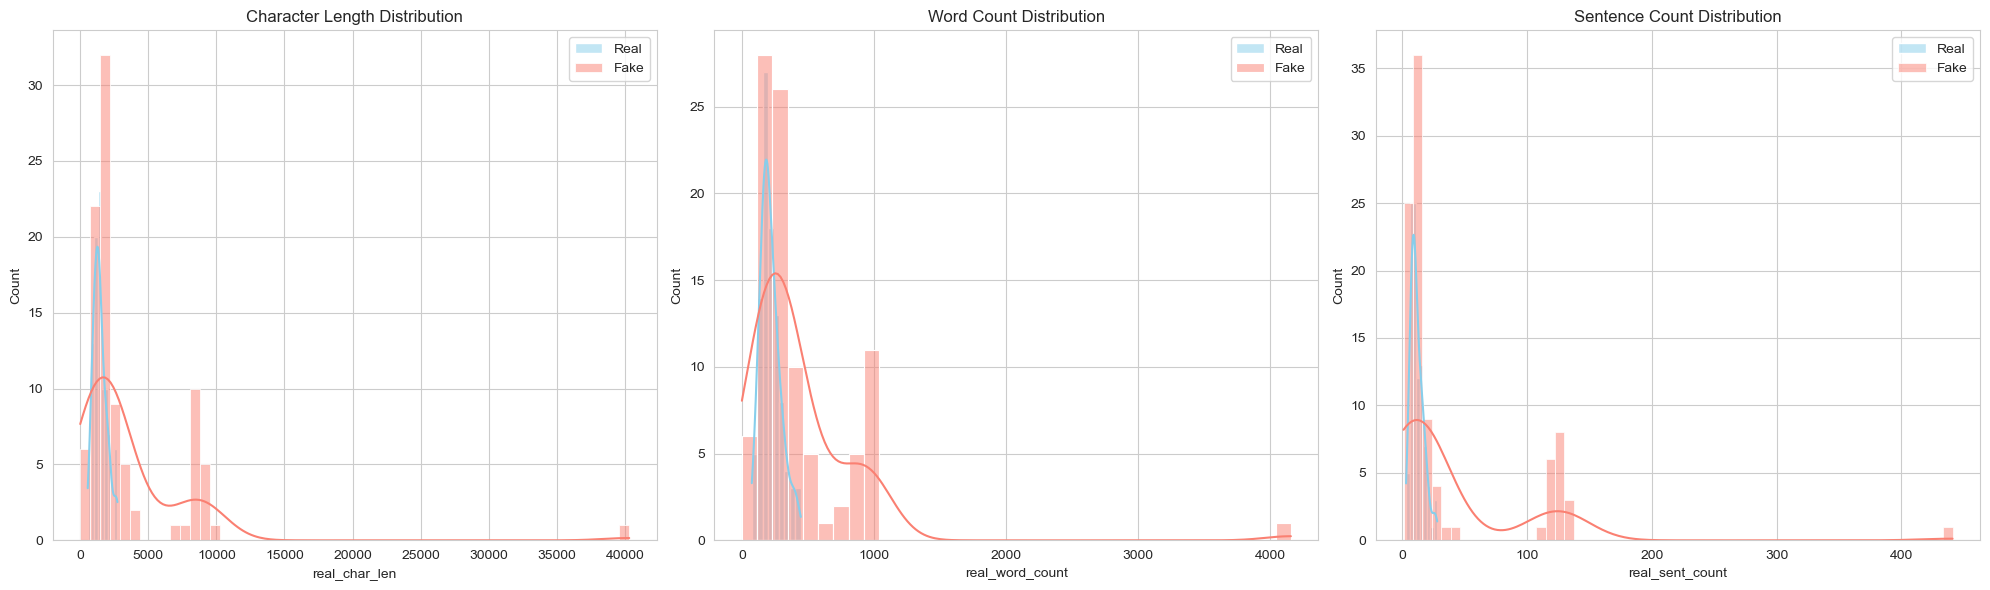

===== Numeric Summary =====
Character Lengths:
  Real  -> min: 552, max: 2734, mean: 1447.31, median: 1373.0
  Fake  -> min: 0, max: 40316, mean: 3421.68, median: 1854.0

Word Counts:
  Real  -> min: 75, max: 446, mean: 216.13, median: 200.0
  Fake  -> min: 0, max: 4158, mean: 428.05, median: 286.0

Sentence Counts:
  Real  -> min: 3, max: 28, mean: 11.76, median: 11.0
  Fake  -> min: 1, max: 441, mean: 37.83, median: 12.0

--- Example Pair (ID: 0) ---

[REAL TEXT]
The VIRSA (Visible Infrared Survey Telescope Array) project produces vast amounts of high quality astronomical datasets used extensively across various fields within astronomy due to its rigorous quality control procedures involving continuous monitoring system stability checks alongside observations done with standard stars combined with extensive processing at dedicated centers . Data is publicly accessible through a specific website managed under Phase III releases where it is searchable via ...

[FAKE TEXT]
The China rel

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Char len
train_df['real_char_len'] = train_df['real_text'].str.len()
train_df['fake_char_len'] = train_df['fake_text'].str.len()

# Word count
train_df['real_word_count'] = train_df['real_text'].str.split().str.len()
train_df['fake_word_count'] = train_df['fake_text'].str.split().str.len()

# Sentence count
train_df['real_sent_count'] = train_df['real_text'].str.split('.').str.len()
train_df['fake_sent_count'] = train_df['fake_text'].str.split('.').str.len()

# Visual
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_style("whitegrid")

# Character Length Distribution
sns.histplot(train_df['real_char_len'], ax=axes[0], color='skyblue', label='Real', kde=True)
sns.histplot(train_df['fake_char_len'], ax=axes[0], color='salmon', label='Fake', kde=True)
axes[0].set_title('Character Length Distribution')
axes[0].legend()

# Word Count Distribution
sns.histplot(train_df['real_word_count'], ax=axes[1], color='skyblue', label='Real', kde=True)
sns.histplot(train_df['fake_word_count'], ax=axes[1], color='salmon', label='Fake', kde=True)
axes[1].set_title('Word Count Distribution')
axes[1].legend()

# Sentence Count Distribution
sns.histplot(train_df['real_sent_count'], ax=axes[2], color='skyblue', label='Real', kde=True)
sns.histplot(train_df['fake_sent_count'], ax=axes[2], color='salmon', label='Fake', kde=True)
axes[2].set_title('Sentence Count Distribution')
axes[2].legend()

plt.tight_layout()
plt.show()

print("===== Numeric Summary =====")
print("Character Lengths:")
print("  Real  -> min: {}, max: {}, mean: {:.2f}, median: {}".format(
    train_df['real_char_len'].min(),
    train_df['real_char_len'].max(),
    train_df['real_char_len'].mean(),
    train_df['real_char_len'].median()
))
print("  Fake  -> min: {}, max: {}, mean: {:.2f}, median: {}".format(
    train_df['fake_char_len'].min(),
    train_df['fake_char_len'].max(),
    train_df['fake_char_len'].mean(),
    train_df['fake_char_len'].median()
))

print("\nWord Counts:")
print("  Real  -> min: {}, max: {}, mean: {:.2f}, median: {}".format(
    train_df['real_word_count'].min(),
    train_df['real_word_count'].max(),
    train_df['real_word_count'].mean(),
    train_df['real_word_count'].median()
))
print("  Fake  -> min: {}, max: {}, mean: {:.2f}, median: {}".format(
    train_df['fake_word_count'].min(),
    train_df['fake_word_count'].max(),
    train_df['fake_word_count'].mean(),
    train_df['fake_word_count'].median()
))

print("\nSentence Counts:")
print("  Real  -> min: {}, max: {}, mean: {:.2f}, median: {}".format(
    train_df['real_sent_count'].min(),
    train_df['real_sent_count'].max(),
    train_df['real_sent_count'].mean(),
    train_df['real_sent_count'].median()
))
print("  Fake  -> min: {}, max: {}, mean: {:.2f}, median: {}".format(
    train_df['fake_sent_count'].min(),
    train_df['fake_sent_count'].max(),
    train_df['fake_sent_count'].mean(),
    train_df['fake_sent_count'].median()
))

# --- Qualitative Analysis: Print a few examples ---
print("\n--- Example Pair (ID: {}) ---".format(train_df.iloc[0]['id']))
print("\n[REAL TEXT]")
print(train_df.iloc[0]['real_text'][:500] + "...")
print("\n[FAKE TEXT]")
print(train_df.iloc[0]['fake_text'][:500] + "...")


# Baseline model

In [5]:
import textstat
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

In [ ]:
def create_features(text):
    """Extracts a dictionary of features from a single text"""
    if not isinstance(text, str) or not text:
        return {
            'char_len': 0, 'word_count': 0, 'sent_count': 0,
            'avg_word_len': 0, 'avg_sent_len': 0, 'stopword_ratio': 0,
            'punct_count': 0, 'flesch_score': 0, 'unique_word_ratio': 0
        }
    words = text.split()
    word_count = len(words)
    char_len = len(text)

    if word_count == 0:
        return {
            'char_len': char_len, 'word_count': 0, 'sent_count': 0,
            'avg_word_len': 0, 'avg_sent_len': 0, 'stopword_ratio': 0, 'punct_count': 0, 'flesch_score': 206.835, 'unique_word_ratio': 0
        }
    
    sent_count = textstat.sentence_count(text)

    avg_word_len = sum(len(word) for word in words) / word_count
    avg_sent_len = word_count / sent_count if sent_count > 0 else 0

    stopwords_in_text = [word for word in words if word.lower() in stop_words]
    stopword_ratio = len(stopwords_in_text) / word_count

    punct_count = len(re.findall(r'[!?,.;:\-\(\)\[\]"\']', text))

    unique_word_ratio = len(set(w.lower() for w in words)) / word_count

    # Readability Scores
    flesch_score = textstat.flesch_reading_ease(text)

    features = {
        'char_len': char_len,
        'word_count': word_count,
        'sent_count': sent_count,
        'avg_word_len': avg_word_len,
        'avg_sent_len': avg_sent_len,
        'stopword_ratio': stopword_ratio,
        'punct_count': punct_count,
        'flesch_score': flesch_score,
        'unique_word_ratio': unique_word_ratio,
    }
    return features

print("Creating features for text_1 and text_2...")

# Apply to text_1
feats_1 = train_df['text_1'].progress_apply(create_features)
feats_1_df = pd.json_normalize(feats_1)
feats_1_df.columns = [f'{col}_1' for col in feats_1_df.columns]

# Apply to text_2
feats_2 = train_df['text_2'].progress_apply(create_features)
feats_2_df = pd.json_normalize(feats_2)
feats_2_df.columns = [f'{col}_2' for col in feats_2_df.columns]

# Concatenate features
feature_df = pd.concat([feats_1_df, feats_2_df], axis=1)

# Create Pairwise (Difference and Ratio) Features
print("Creating pairwise features...")
base_features = [col.replace('_1', '') for col in feats_1_df.columns]
for col in base_features:
    epsilon = 1e-6
    feature_df[f'{col}_diff'] = feature_df[f'{col}_1'] - feature_df[f'{col}_2']
    feature_df[f'{col}_ratio'] = feature_df[f'{col}_1'] / (feature_df[f'{col}_2'] + epsilon)

print("Feature engineering complete.")
display(feature_df.head())


Creating features for text_1 and text_2...


Loading Text 2:   0%|          | 0/95 [00:00<?, ?it/s]

Loading Text 2:   0%|          | 0/95 [00:00<?, ?it/s]

Creating pairwise features...
Feature engineering complete.


,char_len_1,word_count_1,sent_count_1,avg_word_len_1,avg_sent_len_1,stopword_ratio_1,punct_count_1,flesch_score_1,unique_word_ratio_1,char_len_2,...,avg_sent_len_diff,avg_sent_len_ratio,stopword_ratio_diff,stopword_ratio_ratio,punct_count_diff,punct_count_ratio,flesch_score_diff,flesch_score_ratio,unique_word_ratio_diff,unique_word_ratio_ratio
0,2196,304,9,6.226974,33.777778,0.194079,32,-4.937217,0.802632,2018,...,4.177778,1.141141,-0.076191,0.718089,-1,0.969697,-21.858967,-0.291767,0.005334,1.006689
1,3124,454,9,5.883260,50.444444,0.321586,47,-3.233476,0.698238,936,...,27.611111,2.209246,0.058812,1.223808,24,2.043478,-23.044309,-0.163218,-0.155777,0.817594
2,1139,159,4,6.169811,39.750000,0.289308,16,0.219231,0.823899,801,...,-1.916667,0.954000,-0.030692,0.904085,7,1.777778,-17.976952,0.012048,-0.048101,0.944838
3,1774,263,8,5.749049,32.875000,0.326996,52,23.320625,0.726236,1869,...,-4.553571,0.878340,0.056004,1.206658,35,3.058823,24.651213,-17.526566,0.031579,1.045459
4,195,34,3,4.764706,11.333333,0.500000,6,68.431667,0.882353,871,...,-19.416667,0.368564,0.256098,2.049992,-13,0.315789,57.016667,5.994889,0.036824,1.043551


--- Fold 1/5 ---
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 1.21422
Early stopping, best iteration is:
[4]	valid_0's binary_error: 0.473684	valid_0's binary_logloss: 0.687313
Fold 1 Pairwise Accuracy: 0.52632
--- Fold 2/5 ---
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.345771
Early stopping, best iteration is:
[3]	valid_0's binary_error: 0.105263	valid_0's binary_logloss: 0.638941
Fold 2 Pairwise Accuracy: 0.89474
--- Fold 3/5 ---
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_error: 0.210526	valid_0's binary_logloss: 0.382232
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.157895	valid_0's binary_logloss: 0.671063
Fold 3 Pairwise Accuracy: 0.84211
--- Fold 4/5 ---
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_error: 0.157895	v

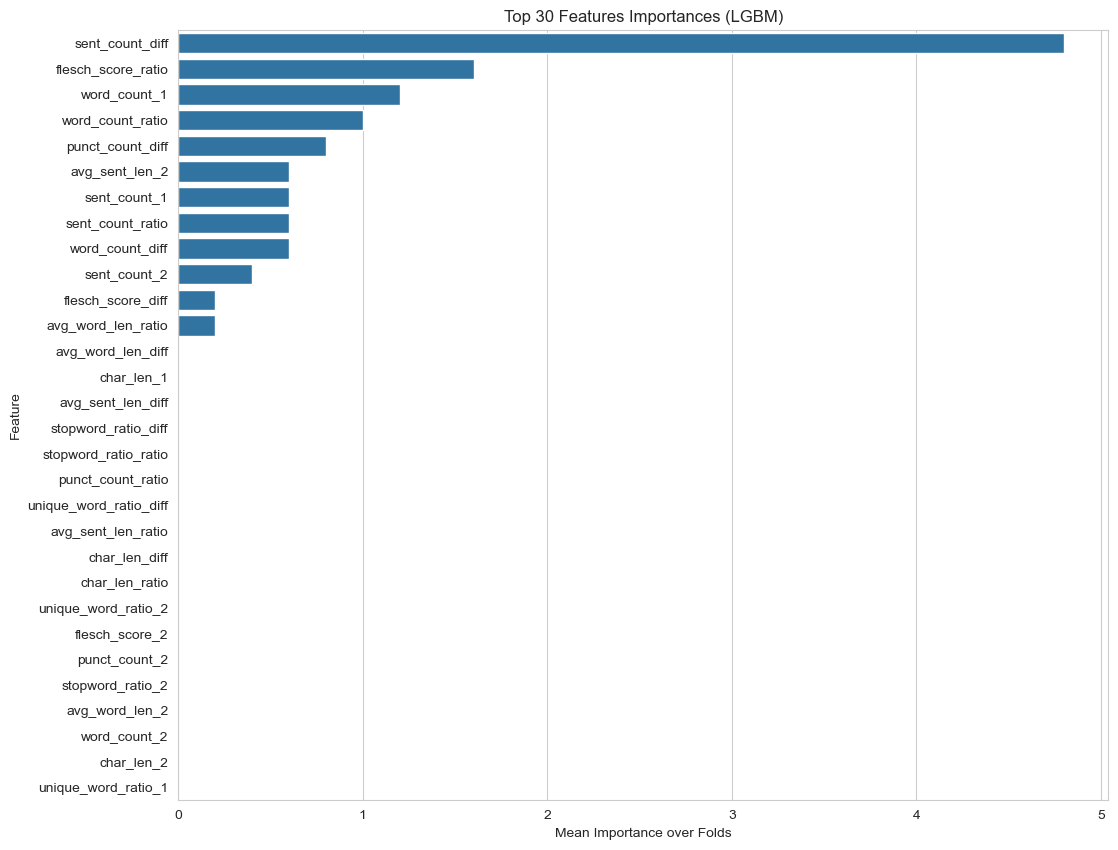

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Target
y = train_df['real_text_id'] - 1
X = feature_df.copy()

N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

oof_preds = np.zeros(len(X))
models = []
feature_importances = pd.DataFrame(index=X.columns)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"--- Fold {fold+1}/{N_SPLITS} ---")

    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    model = lgb.LGBMClassifier(
    objective='binary',
    random_state=42,
    n_estimators=5000,
    learning_rate=0.05,
    num_leaves=31,
    colsample_bytree=0.7,
    subsample=0.7,
    verbose=-1
)


    model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="binary_error",
    callbacks=[lgb.early_stopping(100), lgb.log_evaluation(100)]  
)

    
    preds = model.predict(X_val)
    oof_preds[val_idx] = preds
    models.append(model)
    feature_importances[f'fold_{fold+1}'] = model.feature_importances_

    # Evaluate fold
    acc = accuracy_score(y_val, preds)
    print(f"Fold {fold+1} Pairwise Accuracy: {acc:.5f}")

# Overall CV score
overall_accuracy = accuracy_score(y, oof_preds)
print(f"\nOverall CV Pairwise Accuracy: {overall_accuracy:.5f}")

# Feature importance
feature_importances['mean'] = feature_importances.mean(axis=1)
feature_importances.sort_values('mean', ascending=False, inplace=True)

plt.figure(figsize=(12, 10))
sns.barplot(x='mean', y=feature_importances.index[:30], data=feature_importances.head(30))
plt.title('Top 30 Features Importances (LGBM)')
plt.xlabel('Mean Importance over Folds')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Testing out with opentuna
import optuna

def objective_lgb(trial):
    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'metric': 'binary_error',
        'verbosity': -1,   
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50)
    }

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    accuracies = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Create model with silent mode
        model = lgb.LGBMClassifier(**params, n_estimators=5000)

        # Use callback list to suppress all output
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            callbacks=[
                lgb.early_stopping(stopping_rounds=100, verbose=False),  
                lgb.log_evaluation(period=0)                              
            ]
        )

        preds = model.predict(X_val)
        acc = accuracy_score(y_val, preds)
        accuracies.append(acc)

    return np.mean(accuracies)


study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=100)

# Convert Optuna trials to DataFrame
trials_df = study_lgb.trials_dataframe()

top10_lgb = trials_df.sort_values(by='value', ascending=False).head(10)

print("Top 10 trials (LightGBM):")
print(top10_lgb[['number', 'value', 'params_learning_rate', 'params_num_leaves',
                  'params_max_depth', 'params_subsample', 'params_colsample_bytree',
                  'params_min_child_samples']])


print("Best parameters (LightGBM):", study_lgb.best_params)
print("Best CV accuracy:", study_lgb.best_value)

[I 2025-08-23 14:50:03,218] A new study created in memory with name: no-name-b512b994-a861-4075-b932-55ebee1c121a
[I 2025-08-23 14:50:03,249] Trial 0 finished with value: 0.5157930107526881 and parameters: {'learning_rate': 0.07072279720927473, 'num_leaves': 81, 'max_depth': 15, 'subsample': 0.8025748950716471, 'colsample_bytree': 0.6628023530356381, 'min_child_samples': 49}. Best is trial 0 with value: 0.5157930107526881.
[I 2025-08-23 14:50:03,272] Trial 1 finished with value: 0.5157930107526881 and parameters: {'learning_rate': 0.09623808745300926, 'num_leaves': 48, 'max_depth': 12, 'subsample': 0.6141192882701194, 'colsample_bytree': 0.5134259619294187, 'min_child_samples': 42}. Best is trial 0 with value: 0.5157930107526881.
[I 2025-08-23 14:50:03,300] Trial 2 finished with value: 0.5157930107526881 and parameters: {'learning_rate': 0.0957843494808618, 'num_leaves': 69, 'max_depth': 8, 'subsample': 0.6919462013696724, 'colsample_bytree': 0.6892588290356576, 'min_child_samples': 43

Top 10 trials (LightGBM):
    number     value  params_learning_rate  params_num_leaves  \
78      78  0.831989              0.084051                 29   
85      85  0.831989              0.087460                 32   
54      54  0.831989              0.079851                 27   
51      51  0.831989              0.094669                 28   
48      48  0.831989              0.096383                 25   
46      46  0.831989              0.099999                 24   
45      45  0.831989              0.054538                 20   
71      71  0.831989              0.081521                 27   
74      74  0.831989              0.086999                 26   
32      32  0.831989              0.068142                 37   

    params_max_depth  params_subsample  params_colsample_bytree  \
78                14          0.771570                 0.515697   
85                12          0.686742                 0.630093   
54                15          0.693199                 0.

--- Fold 1/5 ---
[0]	validation_0-error:0.52632
[100]	validation_0-error:0.47368
[102]	validation_0-error:0.47368
Fold 1 Pairwise Accuracy: 0.57895
--- Fold 2/5 ---
[0]	validation_0-error:0.26316
[100]	validation_0-error:0.15789
[105]	validation_0-error:0.15789
Fold 2 Pairwise Accuracy: 0.89474
--- Fold 3/5 ---
[0]	validation_0-error:0.21053
[100]	validation_0-error:0.10526
[108]	validation_0-error:0.10526
Fold 3 Pairwise Accuracy: 0.89474
--- Fold 4/5 ---
[0]	validation_0-error:0.10526
[100]	validation_0-error:0.15789
Fold 4 Pairwise Accuracy: 0.89474
--- Fold 5/5 ---
[0]	validation_0-error:0.36842
[100]	validation_0-error:0.15789
[106]	validation_0-error:0.15789
Fold 5 Pairwise Accuracy: 0.89474

Overall CV Pairwise Accuracy: 0.83158


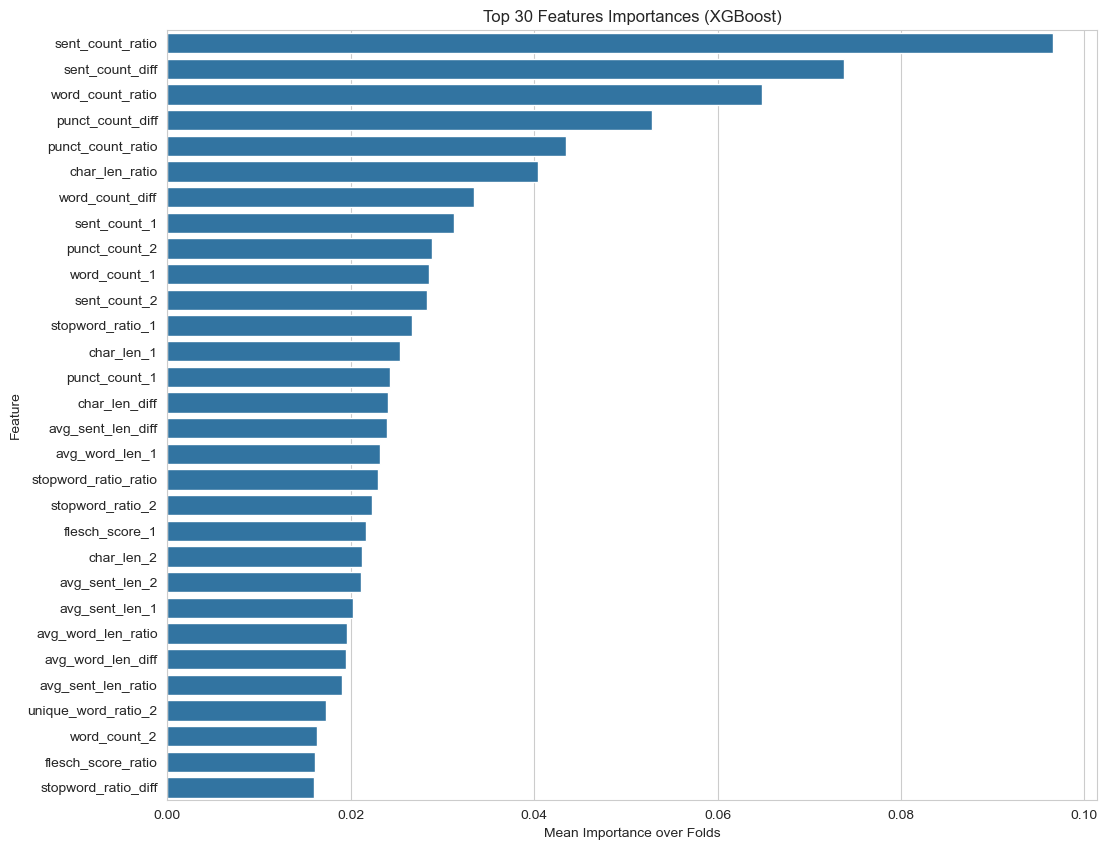

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Target
y = train_df['real_text_id'] - 1
X = feature_df.copy()

N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

oof_preds = np.zeros(len(X))
models = []
feature_importances = pd.DataFrame(index=X.columns)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"--- Fold {fold+1}/{N_SPLITS} ---")

    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    model = xgb.XGBClassifier(
        objective='binary:logistic',
        random_state=42,
        n_estimators=5000,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.7,
        colsample_bytree=0.7,
        tree_method='hist',     
        eval_metric='error',
        early_stopping_rounds=100,  
        verbosity=0
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=100
    )

    preds = model.predict(X_val)
    oof_preds[val_idx] = preds
    models.append(model)
    feature_importances[f'fold_{fold+1}'] = model.feature_importances_

    # Evaluate fold
    acc = accuracy_score(y_val, preds)
    print(f"Fold {fold+1} Pairwise Accuracy: {acc:.5f}")

# Overall CV score
overall_accuracy = accuracy_score(y, oof_preds)
print(f"\nOverall CV Pairwise Accuracy: {overall_accuracy:.5f}")

# Feature importance
feature_importances['mean'] = feature_importances.mean(axis=1)
feature_importances.sort_values('mean', ascending=False, inplace=True)

plt.figure(figsize=(12, 10))
sns.barplot(x='mean', y=feature_importances.index[:30], data=feature_importances.head(30))
plt.title('Top 30 Features Importances (XGBoost)')
plt.xlabel('Mean Importance over Folds')
plt.ylabel('Feature')
plt.show()

In [ ]:
import xgboost as xgb

def objective_xgb(trial):
    params = {
        'objective': 'binary:logistic',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'n_estimators': 5000,
        'tree_method': 'hist',          
        'verbosity': 0,                 
        'eval_metric': 'error',         
        'early_stopping_rounds': 100,   
        'random_state': 42              
    }

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    accuracies = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = xgb.XGBClassifier(**params)
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=False  
        )

        preds = model.predict(X_val)
        acc = accuracy_score(y_val, preds)
        accuracies.append(acc)

    return np.mean(accuracies)

# Run Optuna
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100)

trials_df = study_xgb.trials_dataframe()
top10_trials = trials_df.sort_values("value", ascending=False).head(10)

print("\nTop 10 trials:")
print(top10_trials[["number", "value", "params_learning_rate", "params_max_depth", 
                    "params_subsample", "params_colsample_bytree", "params_min_child_weight"]])


print("Best parameters (XGBoost):", study_xgb.best_params)
print("Best CV accuracy:", study_xgb.best_value)

[I 2025-08-23 14:50:08,010] A new study created in memory with name: no-name-f6b6263c-d015-4451-8431-67024a18c495
[I 2025-08-23 14:50:08,203] Trial 0 finished with value: 0.8111559139784946 and parameters: {'learning_rate': 0.03040950031044752, 'max_depth': 5, 'subsample': 0.8594489402889054, 'colsample_bytree': 0.7587262590211774, 'min_child_weight': 2}. Best is trial 0 with value: 0.8111559139784946.
[I 2025-08-23 14:50:08,360] Trial 1 finished with value: 0.831989247311828 and parameters: {'learning_rate': 0.024696209560142166, 'max_depth': 9, 'subsample': 0.6190403748455806, 'colsample_bytree': 0.8106914060074802, 'min_child_weight': 4}. Best is trial 1 with value: 0.831989247311828.
[I 2025-08-23 14:50:08,494] Trial 2 finished with value: 0.5157930107526881 and parameters: {'learning_rate': 0.07352738604428982, 'max_depth': 11, 'subsample': 0.6698765766965211, 'colsample_bytree': 0.8781855557618401, 'min_child_weight': 18}. Best is trial 1 with value: 0.831989247311828.
[I 2025-08


Top 10 trials:
    number     value  params_learning_rate  params_max_depth  \
75      75  0.873656              0.048432                 8   
98      98  0.863239              0.037680                 8   
93      93  0.863239              0.044440                 8   
92      92  0.863239              0.044632                 9   
81      81  0.863239              0.048771                14   
76      76  0.863239              0.062944                14   
53      53  0.853159              0.048532                 4   
71      71  0.852823              0.041595                 9   
85      85  0.852823              0.053439                 8   
21      21  0.852823              0.019808                 9   

    params_subsample  params_colsample_bytree  params_min_child_weight  
75          0.699363                 0.828613                        1  
98          0.706540                 0.809041                        1  
93          0.656502                 0.816812               